## Importing the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [15]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ2_intrapoliert/training", 1, 12)
X_train = training_set.iloc[:, 2:].values
y_train = training_set.iloc[:, 1].values
test_set = get_single_dataset("training_data/Typ1_intrapoliert/test")
X_test = test_set.iloc[:, 2:].values
y_test = test_set.iloc[:, 1].values

## Training the Multiple Linear Regression model

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results on independent test set

In [17]:
y_pred = regressor.predict(X_test)

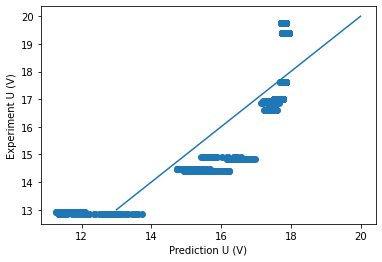

In [18]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6496488209374958

In [20]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

1.1579448364827782


In [21]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

103.95909588523755


In [22]:
z = np.arange(1, 2766)

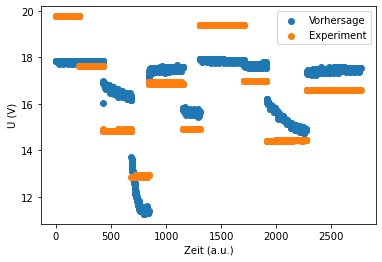

In [23]:
plt.scatter(z, y_pred, label='Vorhersage')
plt.scatter(z, y_test, label='Experiment')
plt.xlabel("Zeit (a.u.)")
plt.ylabel("U (V)")
plt.legend(loc='best')
plt.show()

In [24]:
ascii.write([y_test, y_pred], 'mlin_u_train2test1_originalH2_1Dataset.dat', names=['y_test', 'y_pred'], overwrite=True)